In [1]:
import numpy as np
import pandas as pd
from pandas import Series,DataFrame

import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('whitegrid')

%matplotlib inline

In [2]:
from sklearn import linear_model
from sklearn.datasets import load_iris

iris = load_iris()
X = iris.data
Y = iris.target

print iris.DESCR

Iris Plants Database

Notes
-----
Data Set Characteristics:
    :Number of Instances: 150 (50 in each of three classes)
    :Number of Attributes: 4 numeric, predictive attributes and the class
    :Attribute Information:
        - sepal length in cm
        - sepal width in cm
        - petal length in cm
        - petal width in cm
        - class:
                - Iris-Setosa
                - Iris-Versicolour
                - Iris-Virginica
    :Summary Statistics:

    ============== ==== ==== ======= ===== ====================
                    Min  Max   Mean    SD   Class Correlation
    ============== ==== ==== ======= ===== ====================
    sepal length:   4.3  7.9   5.84   0.83    0.7826
    sepal width:    2.0  4.4   3.05   0.43   -0.4194
    petal length:   1.0  6.9   3.76   1.76    0.9490  (high!)
    petal width:    0.1  2.5   1.20  0.76     0.9565  (high!)
    ============== ==== ==== ======= ===== ====================

    :Missing Attribute Values: None
  

In [3]:
iris_data = DataFrame(X,columns=['Sepal Length','Sepal Width','Petal Length','Petal Width'])
iris_target = DataFrame(Y,columns=['Species'])

In [4]:
iris_data.head()

,Sepal Length,Sepal Width,Petal Length,Petal Width
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [5]:
iris_target.head()

,Species
0,0
1,0
2,0
3,0
4,0


In [8]:
def flower(num):
    if num==0:
        return 'Setosa'
    if num==1:
        return 'Veriscolour'
    else:
        return 'Virginica'

iris_target['Species']=iris_target['Species'].apply(flower)

In [10]:
iris_target.tail()

,Species
145,Virginica
146,Virginica
147,Virginica
148,Virginica
149,Virginica


In [11]:
iris = pd.concat([iris_data,iris_target],axis=1)

In [12]:
iris.head()

,Sepal Length,Sepal Width,Petal Length,Petal Width,Species
0,5.1,3.5,1.4,0.2,Setosa
1,4.9,3.0,1.4,0.2,Setosa
2,4.7,3.2,1.3,0.2,Setosa
3,4.6,3.1,1.5,0.2,Setosa
4,5.0,3.6,1.4,0.2,Setosa


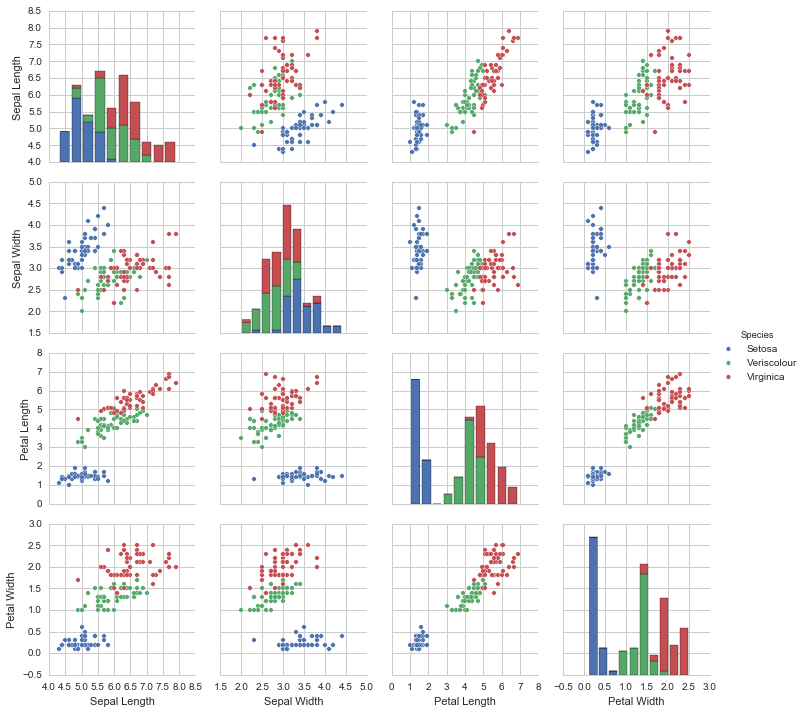

In [13]:
sns.pairplot(iris,hue='Species')

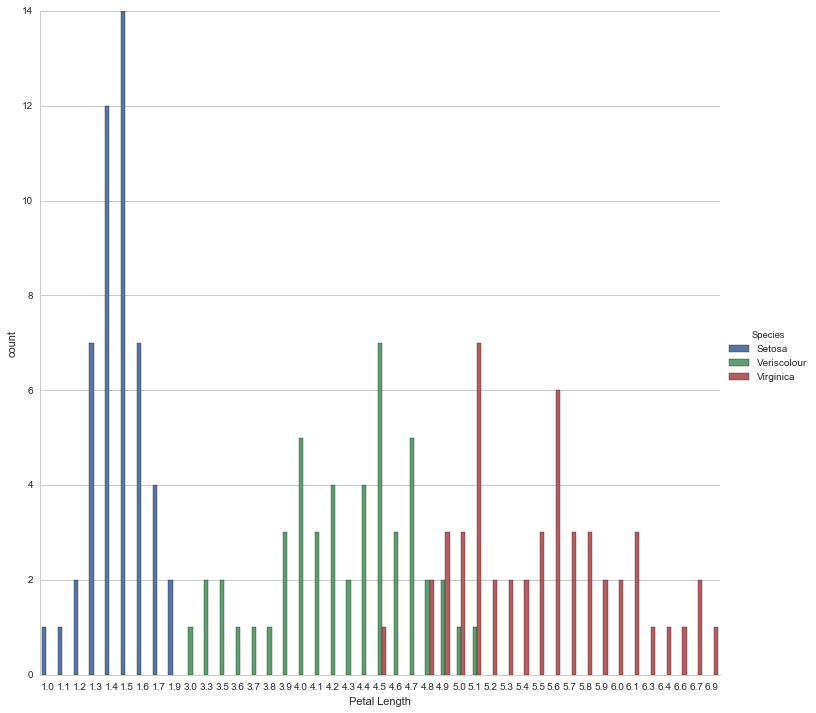

In [15]:
sns.factorplot('Petal Length',data=iris,hue='Species',kind='count',size=10)

In [16]:
from sklearn.linear_model import LogisticRegression
from sklearn.cross_validation import train_test_split

In [19]:
logreg= LogisticRegression()
X_train,X_test,Y_train,Y_test = train_test_split(iris_data,Y,test_size=0.4,random_state=3)
logreg.fit(X_train,Y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [20]:
from sklearn import metrics

In [21]:
Y_pred = logreg.predict(X_test)
print metrics.accuracy_score(Y_test,Y_pred)

0.933333333333


In [22]:
from sklearn.neighbors import KNeighborsClassifier


In [23]:
knn = KNeighborsClassifier(n_neighbors=6)
knn.fit(X_train,Y_train)
Y_pred = knn.predict(X_test)
print metrics.accuracy_score(Y_test,Y_pred)

0.95


In [24]:
knn = KNeighborsClassifier(n_neighbors=1)
knn.fit(X_train,Y_train)
Y_pred = knn.predict(X_test)
print metrics.accuracy_score(Y_test,Y_pred)

0.966666666667


In [25]:
k_range = range(1,21)

accuracy = []

for k in k_range:
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train,Y_train)
    Y_pred = knn.predict(X_test)
    accuracy.append(metrics.accuracy_score(Y_test,Y_pred))

In [26]:
accuracy

[0.96666666666666667,
 0.96666666666666667,
 0.94999999999999996,
 0.94999999999999996,
 0.93333333333333335,
 0.94999999999999996,
 0.94999999999999996,
 0.94999999999999996,
 0.94999999999999996,
 0.93333333333333335,
 0.93333333333333335,
 0.94999999999999996,
 0.96666666666666667,
 0.96666666666666667,
 0.96666666666666667,
 0.94999999999999996,
 0.96666666666666667,
 0.94999999999999996,
 0.94999999999999996,
 0.94999999999999996]

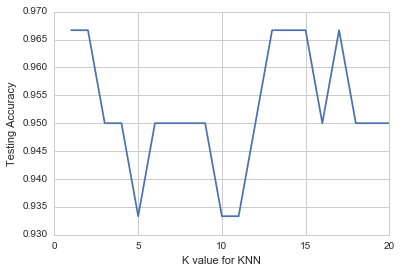

In [28]:
plt.plot(k_range,accuracy)
plt.xlabel('K value for KNN')
plt.ylabel('Testing Accuracy')